# Puneethkrishna_DSFT8_MINI_PROJECT_2

## &#10148;Problem Statement </br> 
### <div class="alert alert-info">Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing various houses into different grades based on various parameters. This would help agents in identifying the type of house a customer is looking for. This way, the search for the house can be narrowed down by focusing only on the ‘condition of the house’</div>

## &#10148; Requried Libraries</br>

In [1]:
import pandas as pd                                                # Working with dataframe and series
import numpy as np                                                 # Working with numpy arrays
import matplotlib.pyplot as plt                                    # Visualization library
import seaborn as sns                                              # Visualization library
from sklearn.preprocessing import LabelEncoder                     # For converting cat to num
import warnings
warnings.filterwarnings('ignore')                                  # To avoide the warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler     # For scaling purpose
from sklearn.model_selection import StratifiedKFold                # Splitting technique
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'})                       # plots background highlight
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   # Type of data extraction
from sklearn.metrics import accuracy_score                         # Evaluation tool
from sklearn.metrics import precision_score                         # Evaluation tool
from sklearn.metrics import f1_score                                # Evaluation tool
from sklearn.metrics import recall_score                            # Evaluation tool
from sklearn.naive_bayes import GaussianNB                          # Algorithm for model building
from sklearn.metrics import classification_report                   # Error terms
from sklearn.tree import DecisionTreeClassifier                     # Algorithm for model building
from sklearn.ensemble import AdaBoostClassifier                     # Algorithm for model building
from sklearn.neighbors import KNeighborsClassifier                  # Algorithm for model building
from sklearn.svm import SVC                                         # Algorithm for model building
from sklearn.naive_bayes import GaussianNB                          # Algorithm for model building
from sklearn.ensemble import StackingClassifier                     # Algorithm for model building
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix

## &#10148; Data import and checking some information about data features</br>

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
# Copy of the dataset
H_df = df.drop(['Id'], axis = 1).copy(deep = True)

In [4]:
# Structure of the dataset
H_df.shape

(3000, 13)

In [5]:
# Information of the dataset features
H_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area(total)     3000 non-null   int64 
 1   Trooms          3000 non-null   int64 
 2   Nbedrooms       3000 non-null   int64 
 3   Nbwashrooms     3000 non-null   int64 
 4   Twashrooms      3000 non-null   int64 
 5   roof            3000 non-null   object
 6   Roof(Area)      3000 non-null   int64 
 7   Lawn(Area)      3000 non-null   int64 
 8   Nfloors         3000 non-null   int64 
 9   API             3000 non-null   int64 
 10  ANB             3000 non-null   int64 
 11  Expected price  3000 non-null   int64 
 12  Grade           3000 non-null   object
dtypes: int64(11), object(2)
memory usage: 304.8+ KB


In [6]:
# Statistical information of the dataset features
H_df.describe([.95, .99])

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
50%,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
95%,357.000000,9.000000,8.000000,7.000000,9.000000,116.000000,118.000000,7.000000,97.000000,6.00000,4747.050000
99%,360.000000,9.000000,8.000000,8.000000,10.000000,119.000000,120.000000,7.000000,100.000000,6.00000,5005.010000
max,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


## &#10148; Exploratory Data Analysis</br>

In [7]:
H_df['Grade'].unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [8]:
H_df.isnull().sum()

Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

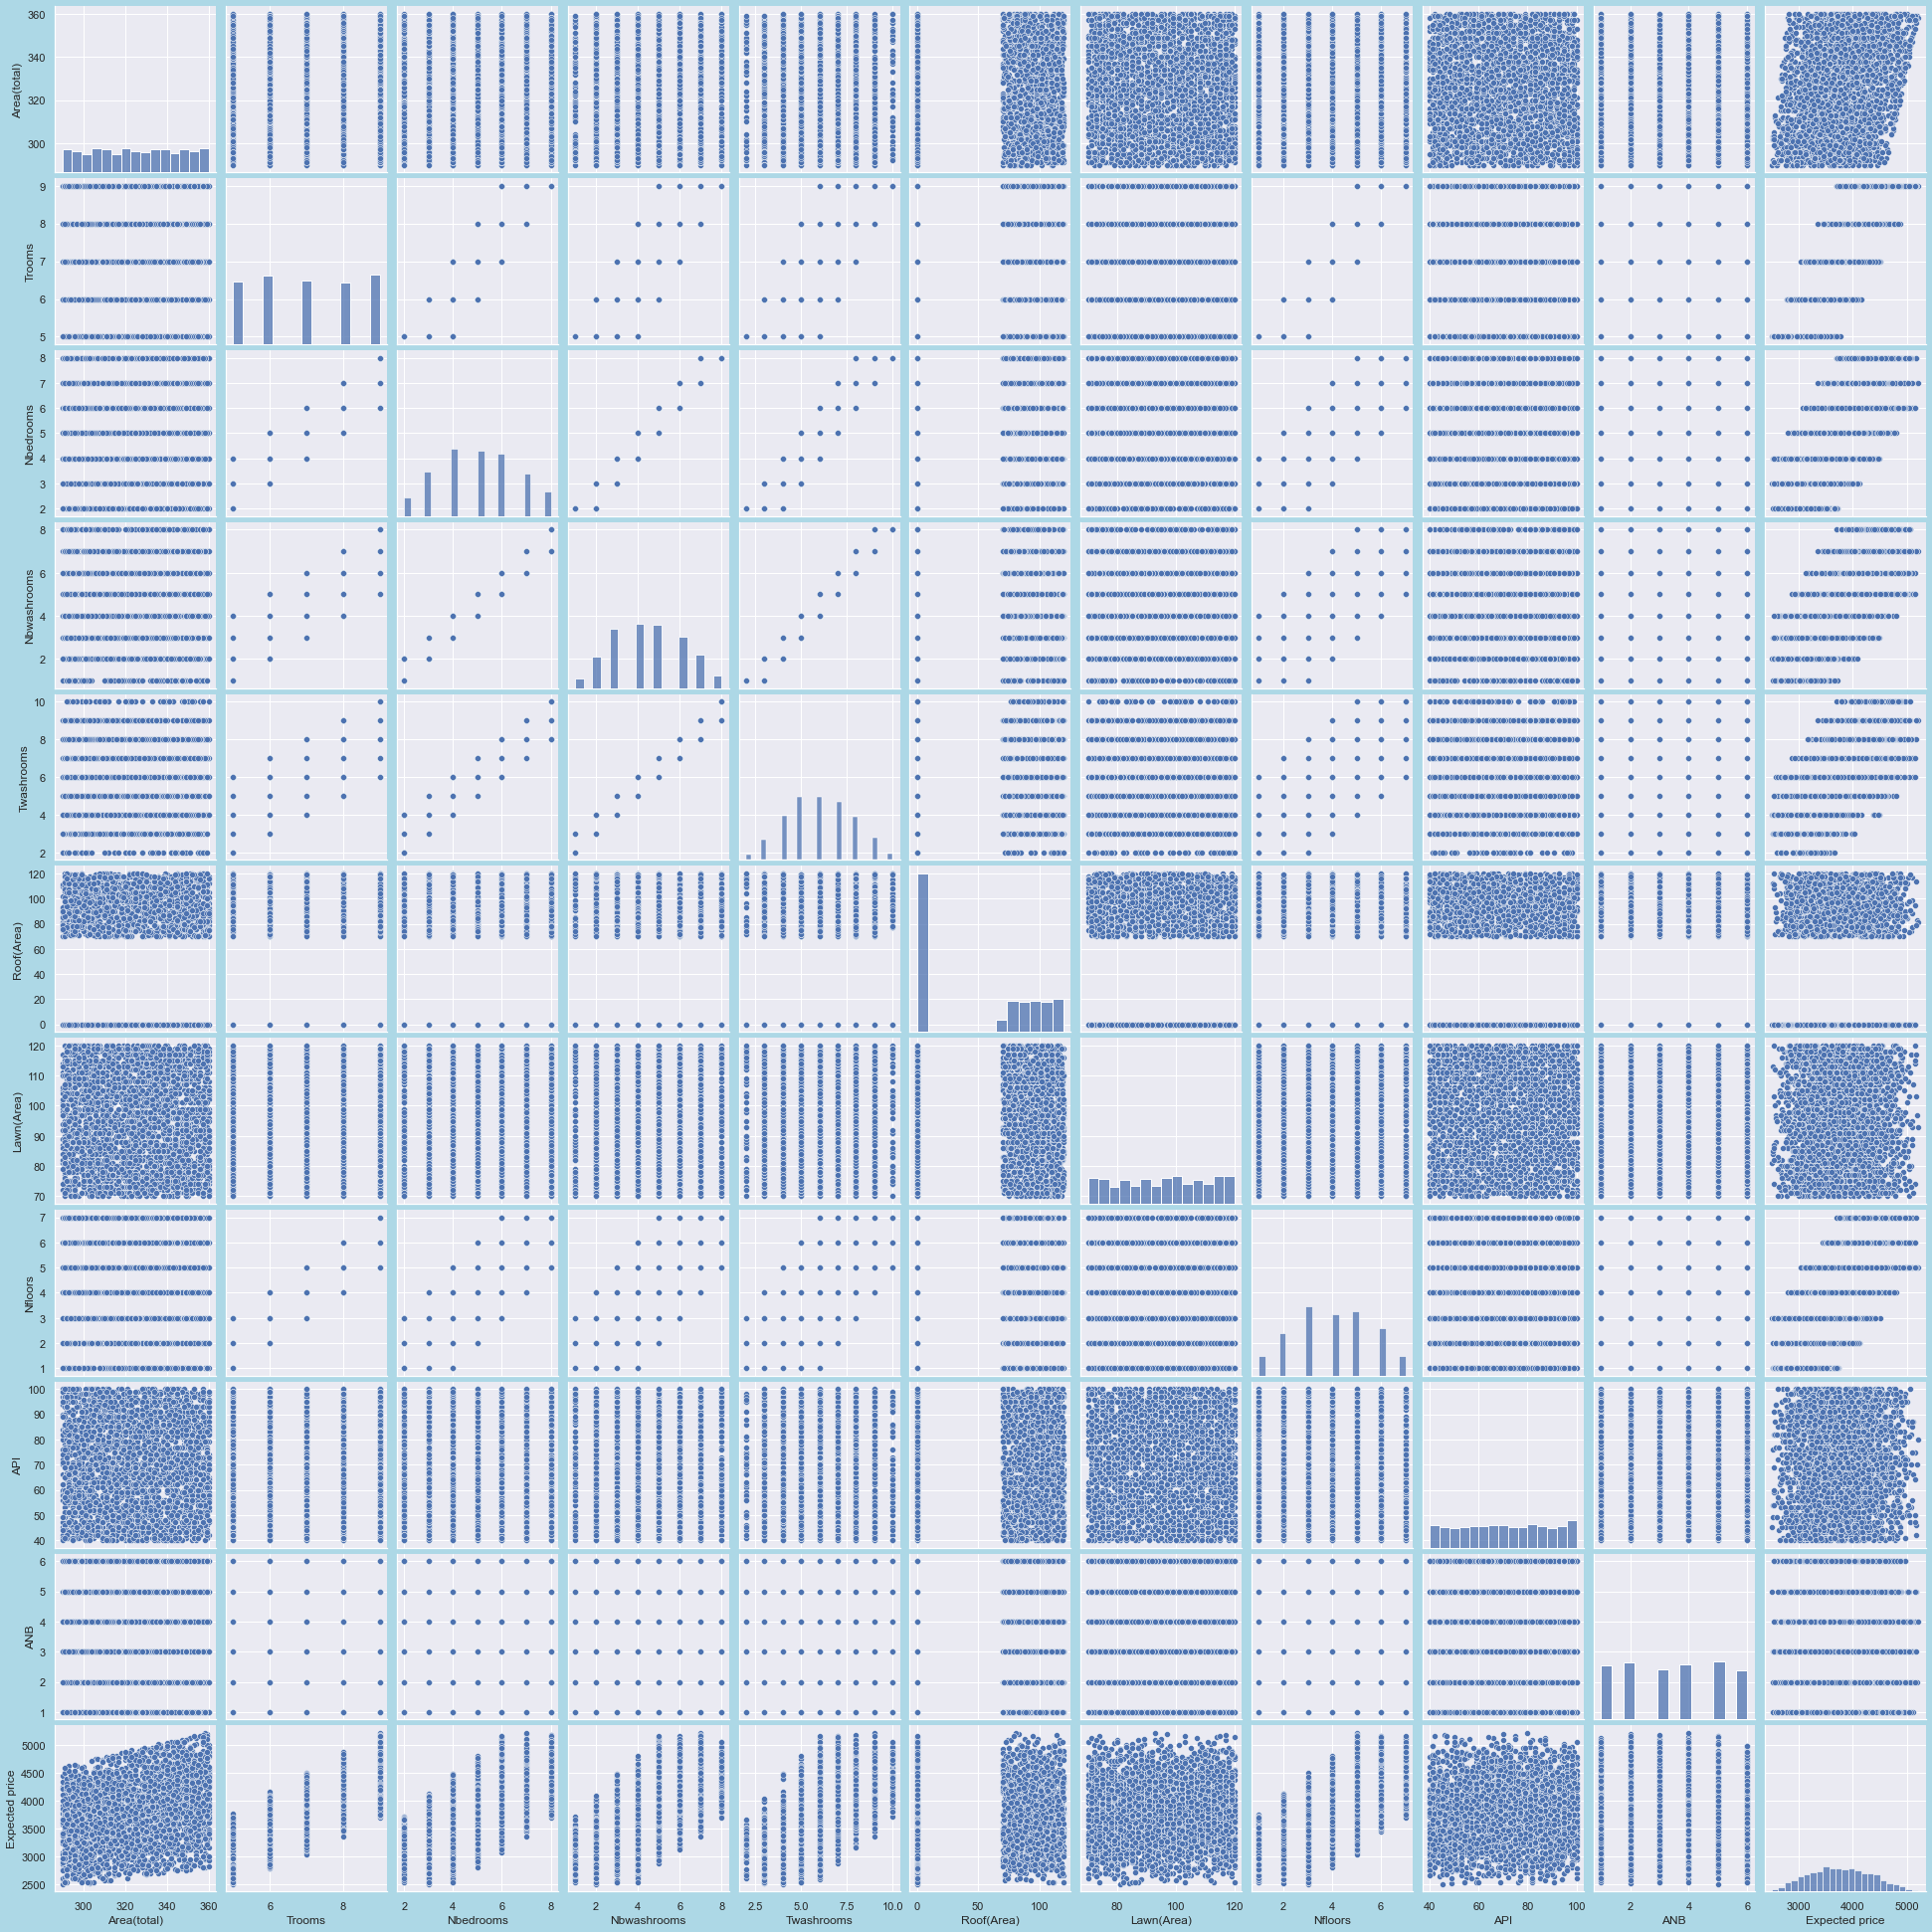

In [9]:
sns.pairplot(H_df)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above pair plot we can see how the numerical columns are related to each other and we can see that the independent columns are showing higher relation with each other**</div>

In [10]:
c = H_df.select_dtypes(include = 'object')
n = H_df.select_dtypes(exclude = 'object')

In [11]:
n.columns

Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Expected price'],
      dtype='object')

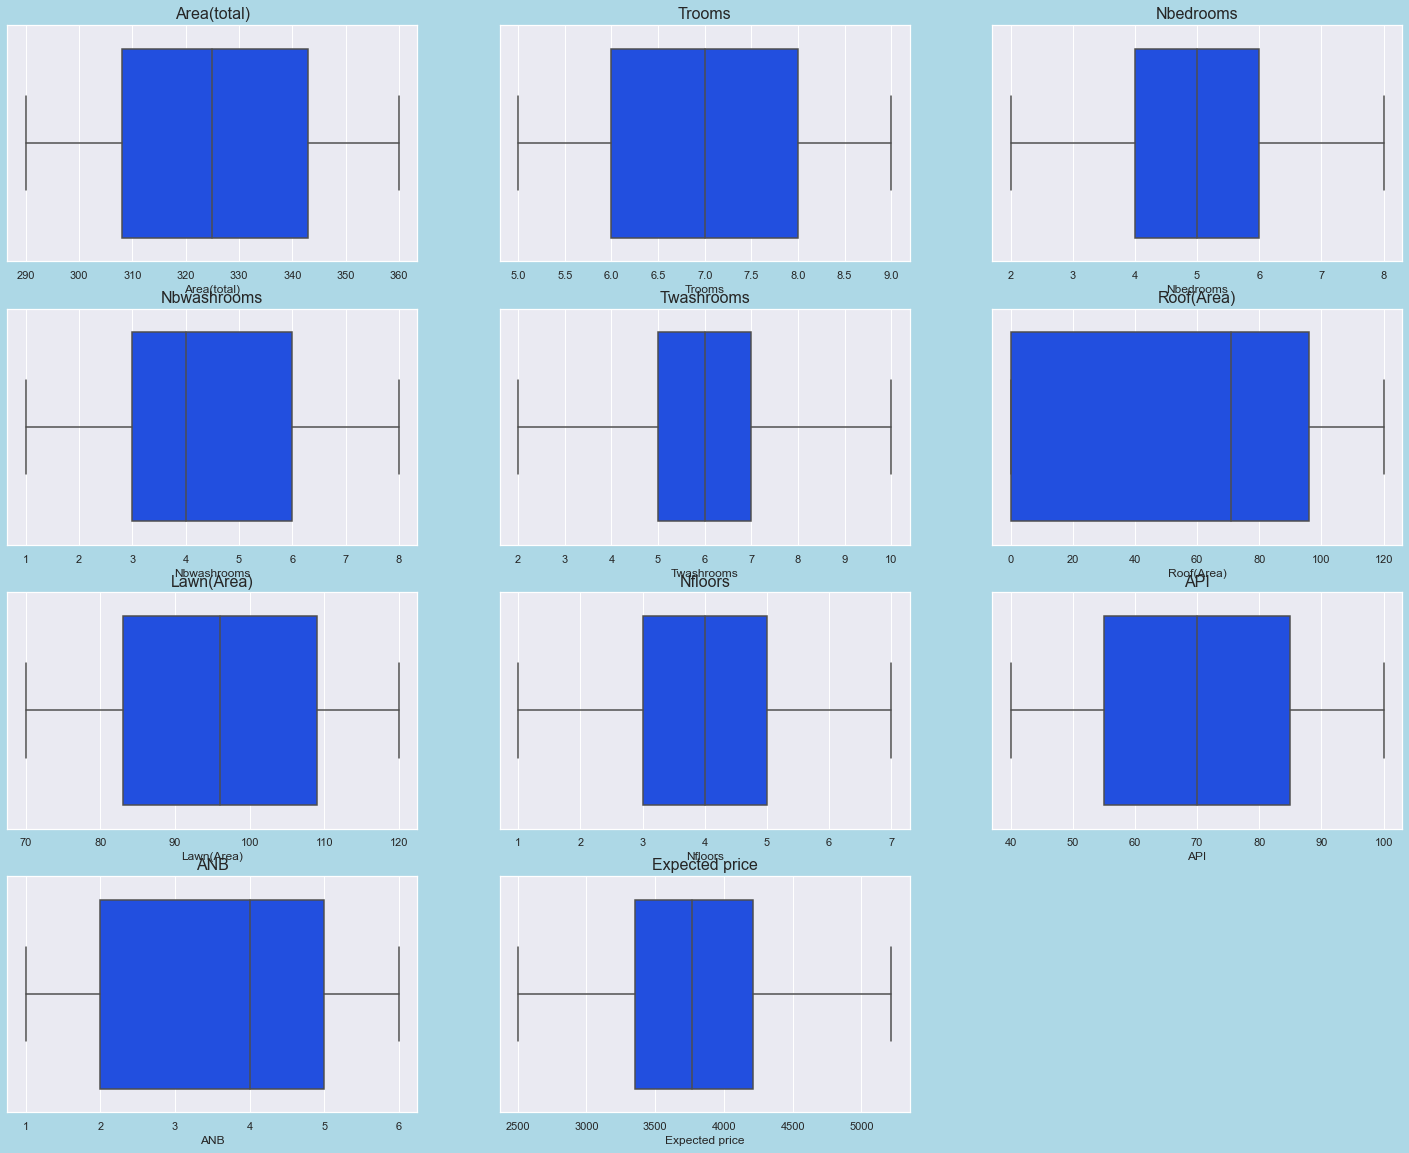

In [12]:
t = 1
plt.figure(figsize = (25, 20))
for i in n.columns:
    plt.subplot(4, 3, t)
    sns.boxplot(H_df[i], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
**- From the above box plot we can see there is no outliers in the dataset**</div>

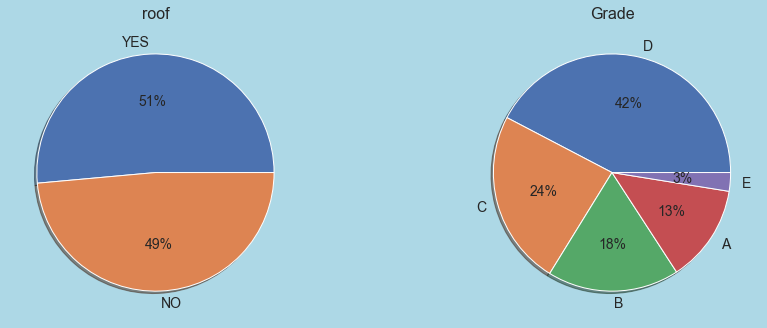

In [13]:
t = 1
plt.figure(figsize = (15, 12))
for i in c.columns:
    plt.subplot(2, 2, t)
    plt.pie(H_df[i].value_counts(), labels = H_df[i].value_counts().index, autopct = '%.0f%%', shadow = True, textprops={'fontsize': 14})
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
- **From the above vizualization we can see that the houses with roof and without roof are similar in proportion**
- **The D grade houses are more in proportion**
- **From the above plot we can see the dependent column is not equally proportional so the data has high bias**

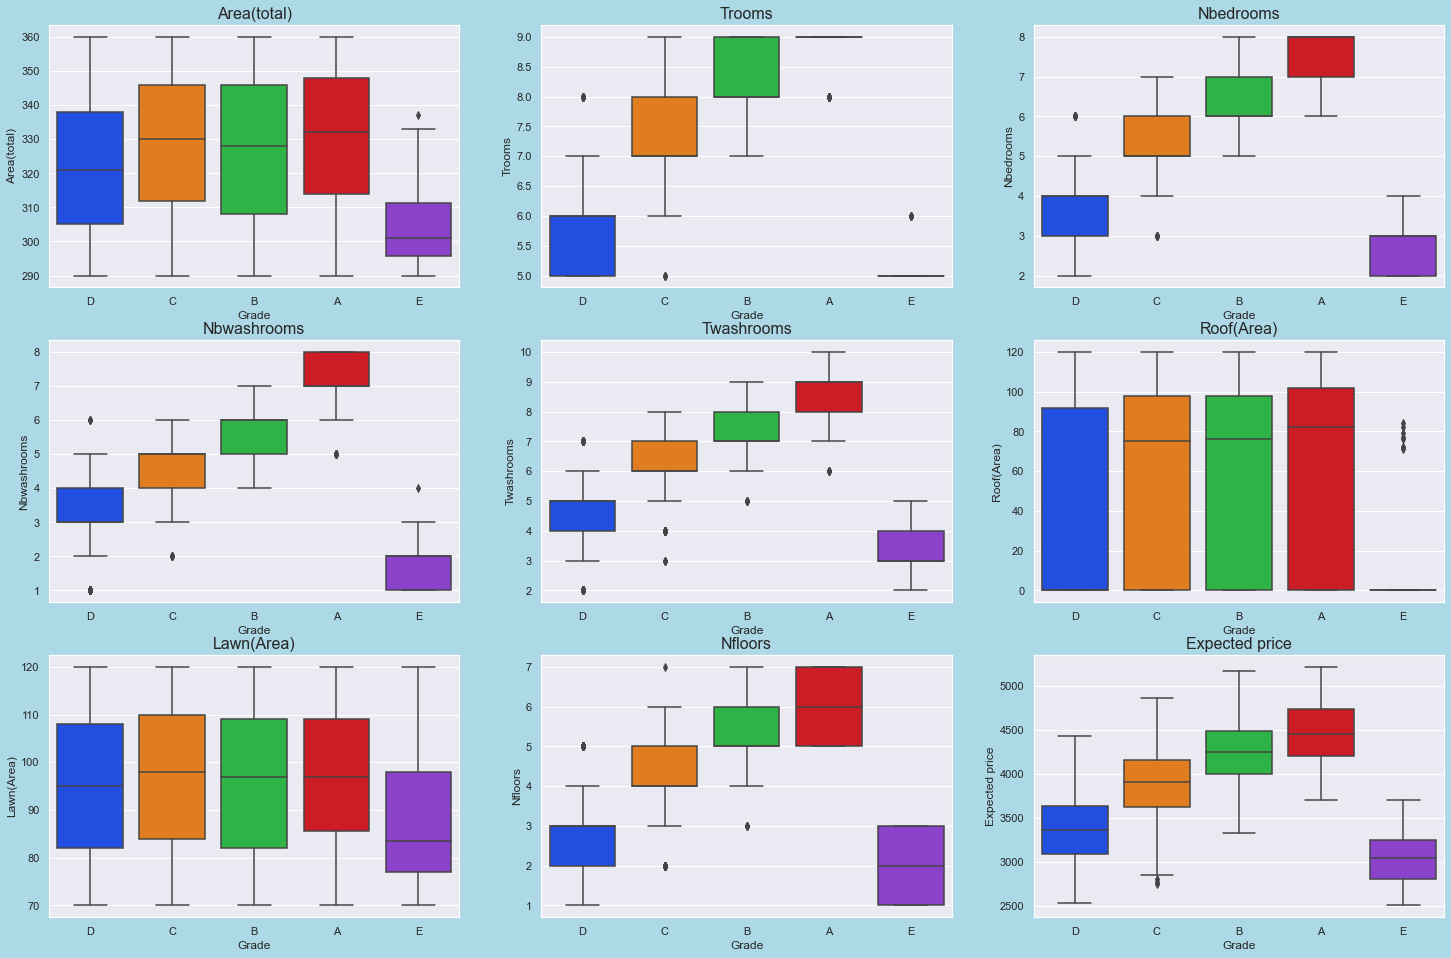

In [14]:
t = 1
plt.figure(figsize=(25, 28))
for i in n.drop(['ANB', 'API'], axis = 1).columns:
    plt.subplot(5, 3, t)
    sns.boxplot(y = df[i], x = H_df['Grade'], palette = 'bright')
    plt.title(i, fontsize = 16)
    t = t + 1

### <div class="alert alert-info">Interpretation
- **Above box plot is distribution of different grade houses in different feature perspective**
- **We can see that the A grade houses has all the maximum facilities corresponding to different features** 

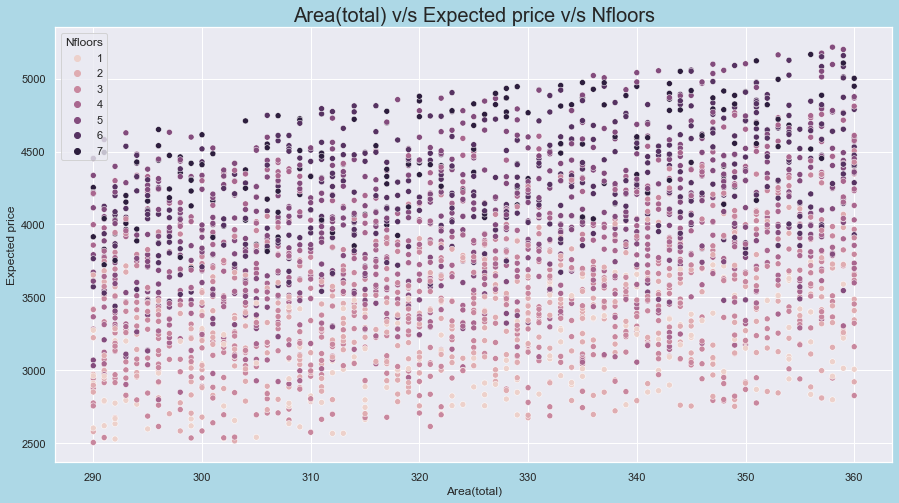

In [15]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = H_df['Area(total)'], y = H_df['Expected price'], hue = H_df['Nfloors'])
plt.title('Area(total) v/s Expected price v/s Nfloors', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that number of floors doesn't have any relation between total area of the house**
- **As the total area and number of floors increases the price is more** 

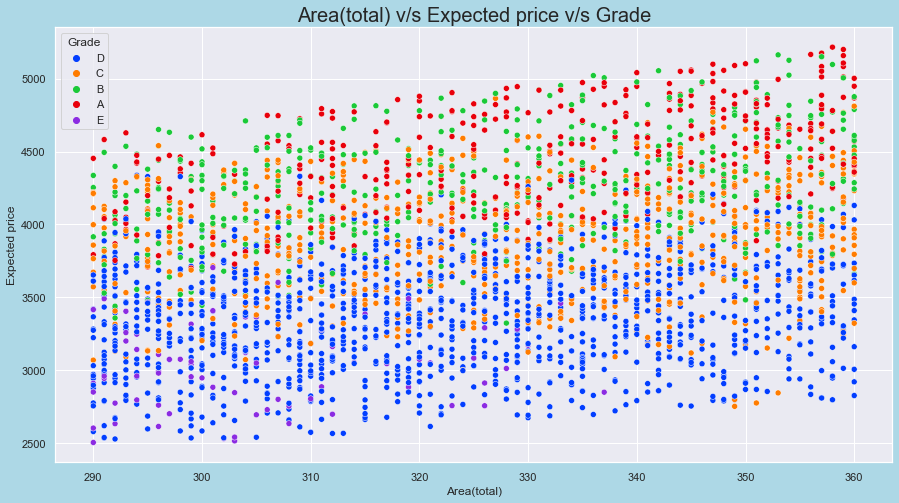

In [16]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = H_df['Area(total)'], y = H_df['Expected price'], hue = H_df['Grade'], palette = 'bright')
plt.title('Area(total) v/s Expected price v/s Grade', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that grade doesn't have any effect on total area of the house**
- **The A grade and B grade houses have highest price** 

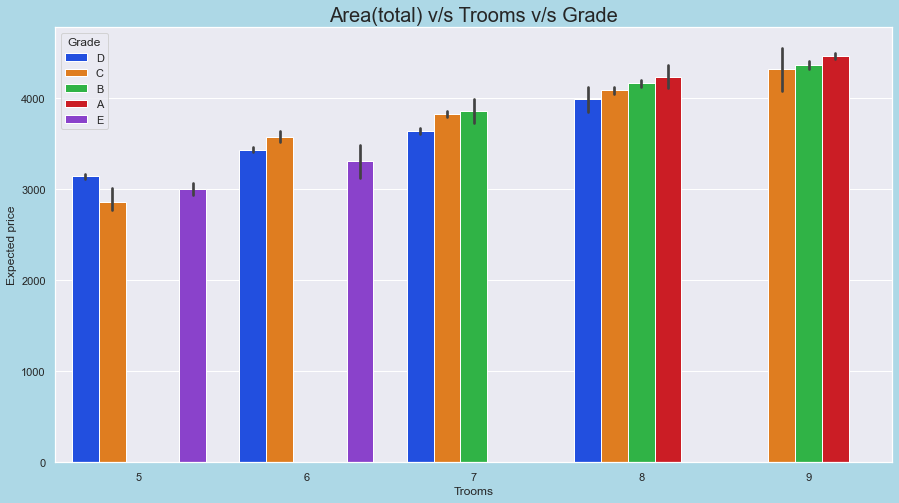

In [17]:
plt.figure(figsize = (15, 8))
sns.barplot(x = H_df['Trooms'], y = H_df['Expected price'], hue = H_df['Grade'], palette = 'bright')
plt.title('Area(total) v/s Trooms v/s Grade', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that grades distribution over number of rooms**
- **The more number of rooms are avialable in grade A, B and C grade houses and the expected price is also more** 

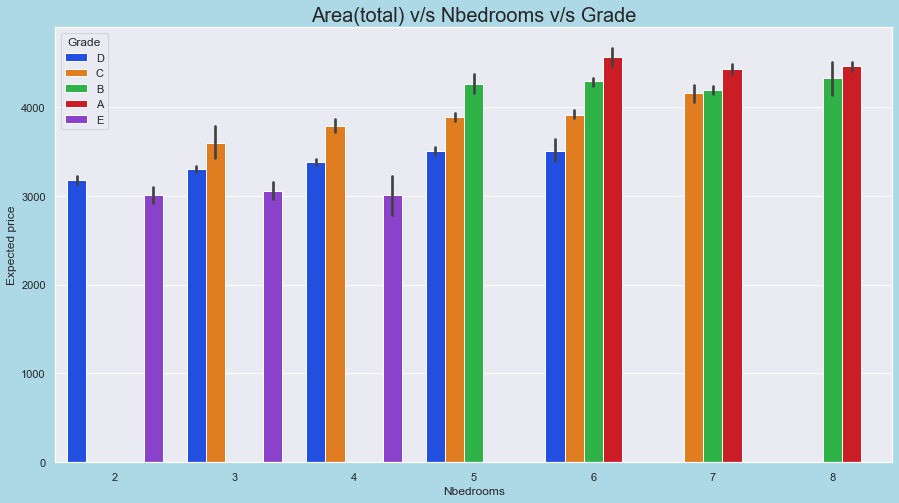

In [18]:
plt.figure(figsize = (15, 8))
sns.barplot(x = H_df['Nbedrooms'], y = H_df['Expected price'], hue = H_df['Grade'], palette = 'bright')
plt.title('Area(total) v/s Nbedrooms v/s Grade', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that grades distribution over number of bedrooms**
- **The more number of rooms are avialable in grade A and B grade houses and the expected price is also more** 

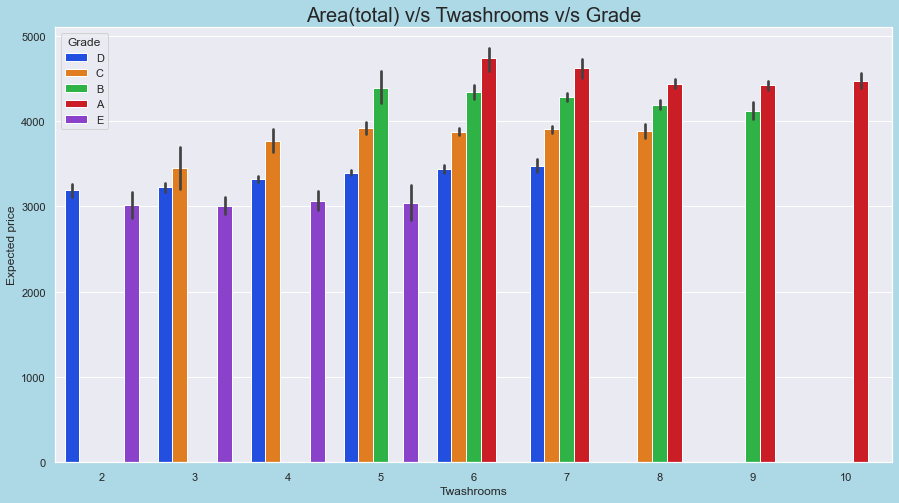

In [19]:
plt.figure(figsize = (15, 8))
sns.barplot(x = H_df['Twashrooms'], y = H_df['Expected price'], hue = H_df['Grade'], palette = 'bright')
plt.title('Area(total) v/s Twashrooms v/s Grade', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that grades distribution over total number of washrooms**
- **The more number of washrooms are avialable in grade A grade houses and the expected price is also more** 

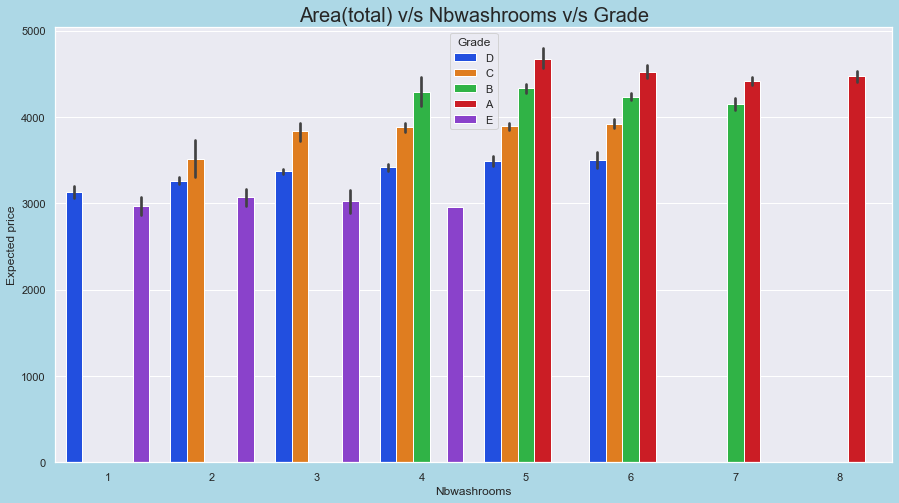

In [20]:
plt.figure(figsize = (15, 8))
sns.barplot(x = df['Nbwashrooms'], y = df['Expected price'], hue = df['Grade'], palette = 'bright')
plt.title('Area(total) v/s Nbwashrooms v/s Grade', fontsize = 20)
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can see that grades distribution over total number of washrooms attached to bedrooms**
- **The more number of washrooms attached to bedroom are avialable in A grade houses and the expected price is also more** 

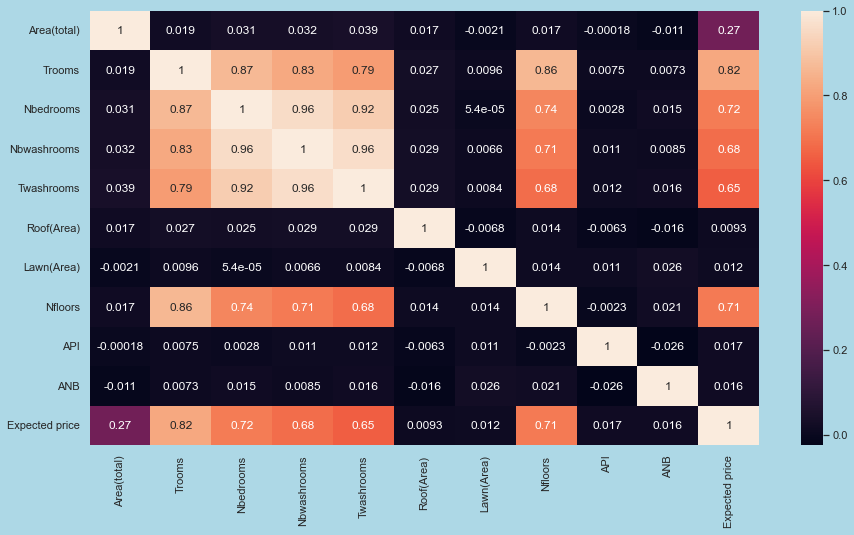

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(H_df.corr(), annot = True)
plt.show()

### <div class="alert alert-info">Interpretation
- **Form the heatmat we can see that some independent columns showing high correlation between each other**
- **In oreder to reduce correlation we can use feature reduction process for getting better model performance**

## &#10148;  Data Preprocessing

### &#10148;  Feature Engineering
#### &#10148;  Feature Transformation

In [22]:
for i in c.columns:
    H_df[i] = H_df[i].astype('category')

In [23]:
H_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Area(total)     3000 non-null   int64   
 1   Trooms          3000 non-null   int64   
 2   Nbedrooms       3000 non-null   int64   
 3   Nbwashrooms     3000 non-null   int64   
 4   Twashrooms      3000 non-null   int64   
 5   roof            3000 non-null   category
 6   Roof(Area)      3000 non-null   int64   
 7   Lawn(Area)      3000 non-null   int64   
 8   Nfloors         3000 non-null   int64   
 9   API             3000 non-null   int64   
 10  ANB             3000 non-null   int64   
 11  Expected price  3000 non-null   int64   
 12  Grade           3000 non-null   category
dtypes: category(2), int64(11)
memory usage: 264.1 KB


In [24]:
for i in c.columns:
    H_df[i] = LabelEncoder().fit_transform(H_df[i])

In [25]:
H_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,320,7,4,4,5,0,0,75,3,40,1,3843,3


#### &#10148;  Feature Scalling

In [26]:
for i in H_df.drop(['Grade'], axis = 1).columns:
    H_df[i] = MinMaxScaler().fit_transform(np.array(H_df[i]).reshape(-1, 1))

In [27]:
H_df.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,3
1,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,3
2,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,2
3,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,3
4,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,3


### <div class="alert alert-info">Interpretation
- **Scaling is done through normalization because outliers are not present in the features and the normalization is is not good with handling the outliers**

#### &#10148;  Spliting the data to test and train

In [28]:
X = H_df.drop(['Grade'], axis = 1).values
Y = H_df['Grade'].values
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

In [29]:
# feature reduction process
lda = LinearDiscriminantAnalysis(n_components = 2).fit_transform(X, Y)

In [30]:
kf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
for train_index, test_index in kf.split(lda, Y):
    X_train1, X_test1 = X[train_index], X[test_index]
    Y_train1, Y_test1 = Y[train_index], Y[test_index]

## &#10148;  Build, Predict and evaluate the model

### <div class="alert alert-info">Observations of EDA
- **The dependent column is discrete**
- **The outliers are not present in the independent features as well as dependent feature**
- **The bias is more in the dependent feature**

### <div class="alert alert-info">Selection of algorithms
- **Based on the EDA observations we need to select classification algorithm where the dependent feature is discreate in nature**
- **As the ourliers are  not present in the features so any algorithm can be selected**
- **The bias is more so we need to select the algorithm which lower the bias**

#### &#10148;  KNN Algorithm

In [31]:
knn = KNeighborsClassifier(n_neighbors=54).fit(X_train, Y_train)

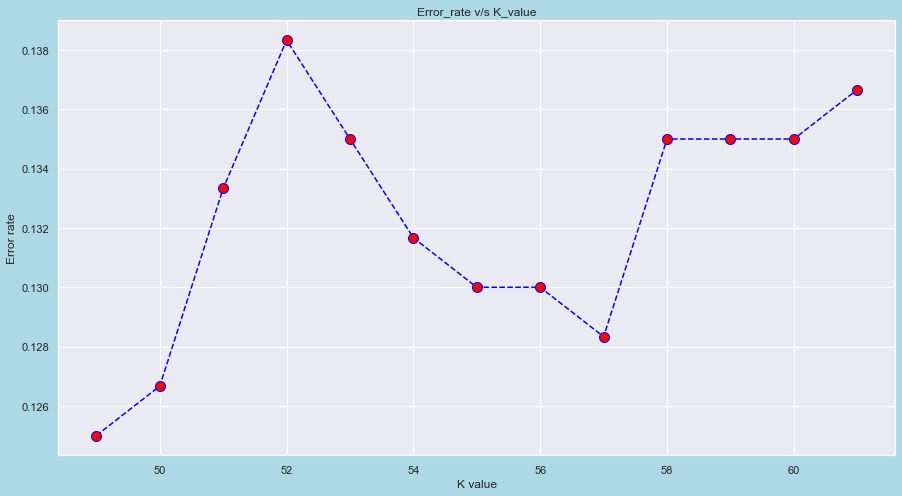

In [32]:
error_rate = []
for i in range(49, 62):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    error_rate.append(np.mean(Y_pred != Y_test))
plt.figure(figsize = (15, 8))
plt.plot(range(49, 62), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',markerfacecolor = 'red', markersize = 10)
plt.title('Error_rate v/s K_value')
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plot we can take optimum k value as 51 which is showing less wrongly predicted value**

In [33]:
# Model building
model1 = KNeighborsClassifier(n_neighbors=51).fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

In [34]:
# Performance
Train_1 = model1.score(X_train, Y_train)
Test_1 = model1.score(X_test, Y_test)
print('Train_performance: ', round(Train_1, 2), 'Test_performance: ', round(Test_1, 2))

Train_performance:  0.89 Test_performance:  0.87


In [35]:
# Error terms
print(classification_report(Y_test, Y_pred1, target_names = ['A', 'B', 'C', 'D', 'E']))

              precision    recall  f1-score   support

           A       0.91      0.75      0.82        79
           B       0.78      0.81      0.79       108
           C       0.87      0.85      0.86       143
           D       0.89      0.99      0.94       254
           E       1.00      0.12      0.22        16

    accuracy                           0.87       600
   macro avg       0.89      0.70      0.73       600
weighted avg       0.87      0.87      0.86       600



In [36]:
accuracy1 = accuracy_score(Y_test, Y_pred1)
precision1 = precision_score(Y_test, Y_pred1, average='weighted')
recall_score1 = recall_score(Y_test, Y_pred1, average='weighted')
f1_score1 = f1_score(Y_test, Y_pred1, average='weighted')

#### &#10148;  DecisionTreeRegressor

In [37]:
model2 = DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=10).fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

In [38]:
# Performance
Train_2 = model2.score(X_train, Y_train)
Test_2 = model2.score(X_test, Y_test)
print('Train_performance: ', round(Train_2, 2), 'Test_performance: ', round(Test_2, 2))

Train_performance:  0.76 Test_performance:  0.75


In [39]:
# Error terms
print(classification_report(Y_test, Y_pred2, target_names = ['A', 'B', 'C', 'D', 'E']))

              precision    recall  f1-score   support

           A       0.96      0.58      0.72        79
           B       0.62      0.85      0.72       108
           C       0.71      0.50      0.58       143
           D       0.79      0.94      0.86       254
           E       0.00      0.00      0.00        16

    accuracy                           0.75       600
   macro avg       0.62      0.57      0.58       600
weighted avg       0.74      0.75      0.73       600



In [40]:
accuracy2 = accuracy_score(Y_test, Y_pred2)
precision2 = precision_score(Y_test, Y_pred2, average='weighted')
recall_score2 = recall_score(Y_test, Y_pred2, average='weighted')
f1_score2 = f1_score(Y_test, Y_pred2, average='weighted')

#### &#10148;  Boosting

In [41]:
model3 = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)

In [42]:
# Performance
Train_3 = model3.score(X_train, Y_train)
Test_3 = model3.score(X_test, Y_test)
print('Train_performance: ', round(Train_3, 2), 'Test_performance: ', round(Test_3, 2))

Train_performance:  0.59 Test_performance:  0.58


In [43]:
# Error terms
print(classification_report(Y_test, Y_pred3, target_names = ['A', 'B', 'C', 'D', 'E']))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        79
           B       0.48      0.87      0.62       108
           C       0.74      0.40      0.52       143
           D       0.73      0.72      0.73       254
           E       0.15      0.69      0.24        16

    accuracy                           0.58       600
   macro avg       0.42      0.54      0.42       600
weighted avg       0.58      0.58      0.55       600



In [44]:
accuracy3 = accuracy_score(Y_test, Y_pred3)
precision3 = precision_score(Y_test, Y_pred3, average='weighted')
recall_score3 = recall_score(Y_test, Y_pred3, average='weighted')
f1_score3 = f1_score(Y_test, Y_pred3, average='weighted')

#### &#10148;  Stacking without feature reduction

In [45]:
def get_stacking():
    level0 = list()
    level0.append(('KNN', KNeighborsClassifier()))
    level0.append(('DT', DecisionTreeClassifier()))
    level0.append(('SVC', SVC()))
    level0.append(('NaiveB', GaussianNB()))
    level1 = DecisionTreeClassifier()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [46]:
model4 = get_stacking().fit(X_train, Y_train)
Y_pred4 = model4.predict(X_test)

In [47]:
# Performance
Train_4 = model4.score(X_train, Y_train)
Test_4 = model4.score(X_test, Y_test)
print('Train_performance: ', round(Train_4, 2), 'Test_performance: ', round(Test_4, 2))

Train_performance:  0.96 Test_performance:  0.93


In [48]:
# Error terms
print(classification_report(Y_test, Y_pred4, target_names = ['A', 'B', 'C', 'D', 'E']))

              precision    recall  f1-score   support

           A       0.91      0.95      0.93        79
           B       0.92      0.88      0.90       108
           C       0.92      0.95      0.93       143
           D       0.98      0.94      0.96       254
           E       0.59      0.81      0.68        16

    accuracy                           0.93       600
   macro avg       0.87      0.91      0.88       600
weighted avg       0.94      0.93      0.93       600



In [49]:
accuracy4 = accuracy_score(Y_test, Y_pred4)
precision4 = precision_score(Y_test, Y_pred4, average='weighted')
recall_score4 = recall_score(Y_test, Y_pred4, average='weighted')
f1_score4 = f1_score(Y_test, Y_pred4, average='weighted')

#### &#10148;  Stacking with feature reduction

In [50]:
model5 = get_stacking().fit(X_train1, Y_train1)
Y_pred5 = model5.predict(X_test1)

In [51]:
# Performance
Train_5 = model5.score(X_train1, Y_train1)
Test_5 = model5.score(X_test1, Y_test1)
print('Train_performance: ', round(Train_5, 2), 'Test_performance: ', round(Test_5, 2))

Train_performance:  0.95 Test_performance:  0.91


In [52]:
print('precision:', precision_score(Y_test1, Y_pred5, average='weighted'))

precision: 0.9132478752184634


In [53]:
# Error terms
print(classification_report(Y_test1, Y_pred5, target_names = ['A', 'B', 'C', 'D', 'E']))

              precision    recall  f1-score   support

           A       0.91      0.90      0.90        79
           B       0.82      0.85      0.84       108
           C       0.91      0.86      0.88       143
           D       0.96      0.97      0.97       254
           E       0.75      0.94      0.83        16

    accuracy                           0.91       600
   macro avg       0.87      0.90      0.89       600
weighted avg       0.91      0.91      0.91       600



In [54]:
accuracy5 = accuracy_score(Y_test1, Y_pred5)
precision5 = precision_score(Y_test1, Y_pred5, average='weighted')
recall_score5 = recall_score(Y_test1, Y_pred5, average='weighted')
f1_score5 = f1_score(Y_test1, Y_pred5, average='weighted')

In [55]:
from IPython.display import display
T = pd.DataFrame({"Algorithms":['KNN','Decission Tree classifier', 'Boosting', 'Stacking without feature reduction', 'Stacking with feature reduction'], 
                  "Train":[round(Train_1, 2), round(Train_2, 2), round(Train_3, 2), round(Train_4, 2), round(Train_5, 2)], 
                  "Test":[round(Test_1, 2), round(Test_2, 2), round(Test_3, 2), round(Test_4, 2), round(Test_5, 2)], 
                  "Accuracy":[round(accuracy1, 2), round(accuracy2, 2), round(accuracy3, 2), round(accuracy4, 2), round(accuracy5, 2)], 
                  "Precision":[round(precision1, 2), round(precision2, 2), round(precision3, 2), round(precision4, 2), round(precision5, 2)],
                  "Recall":[round(recall_score1, 2), round(recall_score2, 2), round(recall_score3, 2), round(recall_score4, 2), round(recall_score5, 2)],
                  "F1_score":[round(f1_score1, 2), round(f1_score2, 2), round(f1_score3, 2), round(f1_score4, 2), round(f1_score5, 2)]
                  })
display(T)

,Algorithms,Train,Test,Accuracy,Precision,Recall,F1_score
0,KNN,0.89,0.87,0.87,0.87,0.87,0.86
1,Decission Tree classifier,0.76,0.75,0.75,0.74,0.75,0.73
2,Boosting,0.59,0.58,0.58,0.58,0.58,0.55
3,Stacking without feature reduction,0.96,0.93,0.93,0.94,0.93,0.93
4,Stacking with feature reduction,0.95,0.91,0.91,0.91,0.91,0.91


### <div class="alert alert-info">Interpretation
- **From the above table we can see that the Stacking with feature reducition is showing better performace for train aswell as test and the f1 score is also more in that model so it is highly accurate model for predictions**

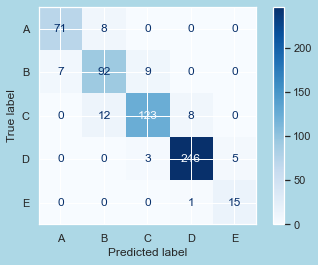

In [56]:
color = 'white'
matrix = plot_confusion_matrix(model5, X_test1, Y_test1, cmap=plt.cm.Blues, display_labels = ['A', 'B', 'C', 'D', 'E'])

### <div class="alert alert-info">Interpretation
- **From the above visualization we can see that the grade B is wrongly predicted more compared to all other grades**

### <div class="alert alert-info">Conclusion
- **For more space, rooms, floors and for more benifits A grade is good and the cost is also high**
- **For big family with less cost C grade houese is best**
- **less rent cost with highest number of washrooms attached with bedrooms B grade houses is best**
- **Less rent cost with medium size family can choose D grade houses**
- **For bachelors or married couples with less members can choose E grade houses**
- **The Stacking is given better performace because the bias was there in the dataset so the perfomace of the staking model is good**
- **The predictions are highly accurate**